## Linear Regression

Linear Regression is a good starting point for regression models


In [11]:
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


Simple Linear Regression will be y = ax+b

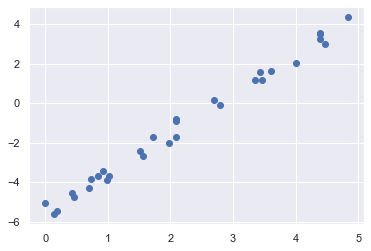

In [12]:
#setting a seed so we get the same result everytime
random_num = np.random.RandomState(1)
x = 5* random_num.rand(30)
y = 2 * x - 6 + random_num.rand(30)
#This will show us how the data for linear regression looks like
plt.scatter(x,y)

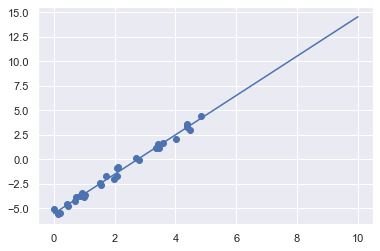

In [13]:
#Now to fit the data we will use Scikit's **Linear Regression** 
from sklearn.linear_model import LinearRegression

#Defining the model
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis] ,y) #The new axis will change dimension of the array
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [14]:
#To print the slope and intercept we have 
print("The slope of the model is :", model.coef_[0])
print("The intercept is :", model.intercept_)
#The results look closer to the inputs



The slope of the model is : 2.0089682752971263
The intercept is : -5.552340500568972


In [15]:
#The LinearRegression estimator not only fits straight lines but it can be used to fit higher dimensional models
#Using numpy's matrix multiplication operator let's build a multidimensional matrix
randomgen = np.random.RandomState(1)
a = 10 * randomgen.rand(100,3)
b = 0.5 + np.dot(a, [1.5, -2.0, 1.0])


In [16]:
#Printing the model slope and intercept
print("The model slope is", model.coef_)
print("The intercept is:", model.intercept_)

The model slope is [2.00896828]
The intercept is: -5.552340500568972


## Basis Functions
We can  use basis functions to adapt linear regression to non linear models by tranforming the data according to basis functions
$x_{n}$ = $f_{n}$ (x) , where fn() is some function that transforms the data.

## Polynomial Basis Function

#### Refer to Polynomialcurvefitting where, 
$f_{n}$ = $x^{n}$

It is a linear model where the values of x will be projected in higher dimension

The polymial basis function is in-built in Scikit learn as the **PolynomialFeatures** transformers


In [17]:
from sklearn. preprocessing import PolynomialFeatures
x1 = np.array([5, 6, 7])
print(x1)
model2 = PolynomialFeatures(4, include_bias = False) #upto 4
#fit_transform from sklearn is used to fit model to data and then transform it.
#will return the transformed array    

model2.fit_transform(x1[:, None])
#will give transformed 3-d array by taking exponent of each element (see explanation in markdown cell)


[5 6 7]


array([[   5.,   25.,  125.,  625.],
       [   6.,   36.,  216., 1296.],
       [   7.,   49.,  343., 2401.]])

In [18]:
#Now the transformed data can be plugged into a linear regression
#We can use a pipeline to do this, have Polynomial Fetures of the 5th degree Polynomial model

In [25]:
from sklearn.pipeline import make_pipeline
#make_pipeline for creating a pipeline of transforms with an estimator
model3 = make_pipeline(PolynomialFeatures(5), LinearRegression())

#Let's use this pipeline on a sine wave with noise
rng =np.random.RandomState(1)
x3 = 10 * rng.rand(50)

y3 = np.sin(x) + 0.1 * rng.randn(50)

# model3.fit(x3, y3) #change the dimensions of x
model3.fit(x3[:, np.newaxis], y3)

x3fit = np.linspace(0, 10, 1000)
estimatedy = model3.predict(x3fit[:, np.newaxis])
plt.scatter(x3, y3)
plt.plot(x3fit, estimatedy)

# By using the 5th order polynomial basis function, we were able to fit our non-linear(sin ) data



ValueError: operands could not be broadcast together with shapes (30,) (50,) 

## Gaussian Basis Function 
Fitting a gaussian basis function to non linear data 
There is no predefined Gaussian transformer in scikit learn like PolynomialFetaures, so we have to make our own transformer


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin

#BaseEstimator- Base class for all estimators
#TransformerMixin- Mixin class for all transformers in scikit-learn.

#making the transformer
class GaussianFeatures(BaseEstimator, TransformerMixin):
#making uniformly spaced Gaussian features for 1-D input

#__init__ is a constructor in python
#def __init__(self, realpart, imagpart):
         #self.r = realpart
         #self.i = imagpart
        
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor 
        
    #staticmethod is a method that takes a single parameter
    @staticmethod    
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    
    def fit(self, X, y = None):
     self.centers_ = np.linspace(X.min(), X.max(), self.N)
     self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
     return self

    def transform(self, X):
        return self._gauss_basis(X[:,:, np.newaxis], self.centers_, self.width_, axis =1)
        


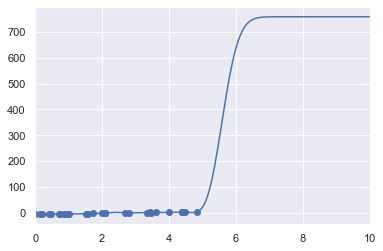

In [27]:
from sklearn.pipeline import make_pipeline

#define the degree of the features
gaussmodel = make_pipeline(GaussianFeatures(20), LinearRegression())
gaussmodel.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yestim = gaussmodel.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yestim)

plt.xlim(0, 10);